## Letterboxd Data exploration

The Data used in this project can be found here: https://www.kaggle.com/datasets/gsimonx37/letterboxd
It will be placed in the directory "letterboxd", that is added to the .gitignore because of file size limitations in GitHub.

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import regex as re
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load data
actors = pd.read_csv("letterboxd/actors.csv")
countries = pd.read_csv("letterboxd/countries.csv")
crew = pd.read_csv("letterboxd/crew.csv")
genres = pd.read_csv("letterboxd/genres.csv")
movies = pd.read_csv("letterboxd/movies.csv")
languages = pd.read_csv("letterboxd/languages.csv")
releases = pd.read_csv("letterboxd/releases.csv")
studios = pd.read_csv("letterboxd/studios.csv")
themes = pd.read_csv("letterboxd/themes.csv")
actors_enriched = pd.read_csv("imdb/actors_imdb_enriched.csv")


# Actors 
Contains name of actor/actress and the corresponsing movie in the form of "id"

In [4]:
#check data
print(actors.head())

#check datatypes
print(actors.dtypes)

        id               name    role
0  1000001      Margot Robbie  Barbie
1  1000001       Ryan Gosling     Ken
2  1000001    America Ferrera  Gloria
3  1000001  Ariana Greenblatt   Sasha
4  1000001           Issa Rae  Barbie
id       int64
name    object
role    object
dtype: object


In [5]:
# check for missing values
print("missing values: " + actors.isnull().sum().astype(str))

# check for duplicates
print("duplicates: " + actors.duplicated().sum().astype(str))

# check for unique values
print("unique: " + actors.nunique().astype(str))


id            missing values: 0
name          missing values: 4
role    missing values: 1361559
dtype: object
duplicates: 946
id       unique: 634302
name    unique: 1600662
role    unique: 1920085
dtype: object


In [6]:
# get top 10 actors with the most movies
top_actors = actors["name"].value_counts().head(10)
print(top_actors)

name
Mel Blanc            1058
Bess Flowers          696
Jagathy Sreekumar     635
Eric Roberts          587
Brahmanandam          581
Nassar                497
Sukumari              461
Mammootty             444
Nedumudi Venu         426
Manorama              425
Name: count, dtype: int64


In [7]:
# replace movie id with movie title in actors dataframe
#rename column name to actor
actors_with_movie_name = actors.copy().rename(columns={"name": "actor"})
actors_with_movie_name = actors_with_movie_name.merge(movies[["id", "name", "date"]], on="id", how="left")
actors_with_movie_name = actors_with_movie_name.rename(columns={"name": "movie_name"})
print(actors_with_movie_name.head())

        id              actor    role movie_name    date
0  1000001      Margot Robbie  Barbie     Barbie  2023.0
1  1000001       Ryan Gosling     Ken     Barbie  2023.0
2  1000001    America Ferrera  Gloria     Barbie  2023.0
3  1000001  Ariana Greenblatt   Sasha     Barbie  2023.0
4  1000001           Issa Rae  Barbie     Barbie  2023.0


In [8]:
# get top 10 movies with the most actors (movie names are not unique, so we will use movie id)
actors_cp = actors.copy()
top_actors_id = actors_cp["id"].value_counts()
top_actors_id = pd.DataFrame(top_actors_id)
top_actors = top_actors_id.merge(movies[["id", "name", "date"]], on="id", how="left")
print(top_actors.head(10))

        id  count                                name    date
0  1123471    555                         Men at Arms  2005.0
1  1027275    451  Bring It On: Worldwide #Cheersmack  2017.0
2  1138767    354                            Dark Sun  1980.0
3  1018495    346                 Outlaw Johnny Black  2023.0
4  1000179    331                 The French Dispatch  2021.0
5  1001509    322                           Malcolm X  1992.0
6  1007519    315     Around the World in Eighty Days  1956.0
7  1000296    298                                 TÁR  2022.0
8  1495515    283                 Putování Jana Amose  1983.0
9  1170566    281                    Days of Betrayal  1973.0


In [9]:
# get the amount of movies the actors starred in
top_actors = actors["name"].value_counts()
top_actors = top_actors[top_actors > top_actors.quantile(0.8)]
print(top_actors)

# what is the average amount of movies actors starred in
average_movies = actors["name"].value_counts().mean()
print(average_movies)

# what is the median amount of movies actors starred in
median_movies = actors["name"].value_counts().median()
print(median_movies)

# what percentage of actors starred in more than 10 movies
a = actors["name"].value_counts()[actors["name"].value_counts() > 20].count()
b = actors["name"].value_counts().count()
percentage = a / b * 100
print(a)
print(b)
print(percentage)

# one html file has about 1.3 MB of data
# because we get the bio of the actors too we have to double it

size = a * 2 * 1.3
size_GB = size / 1024
print(size_GB)



name
Mel Blanc            1058
Bess Flowers          696
Jagathy Sreekumar     635
Eric Roberts          587
Brahmanandam          581
                     ... 
Shana Rae               4
Mark Fairchild          4
Alex Thomson            4
José Carlos             4
Shannon Hamm            4
Name: count, Length: 276752, dtype: int64
3.62252992824219
1.0
49022
1600662
3.062607846003716
124.469921875


{'1-5': np.float64(86.11618192972658), '5-10': np.float64(6.945188928081006), '10-15': np.float64(2.4219978983695496), '15-20': np.float64(1.2720986691756286), '20-25': np.float64(0.7735549416428953), '25-30': np.float64(0.5295309065873994), '30-35': np.float64(0.37571954603782687), '35-40': np.float64(0.2845072851107854), '40-45': np.float64(0.2134741750600689), '45-50': np.float64(0.17611463257077384), '50+': np.float64(0.89163108763749)}


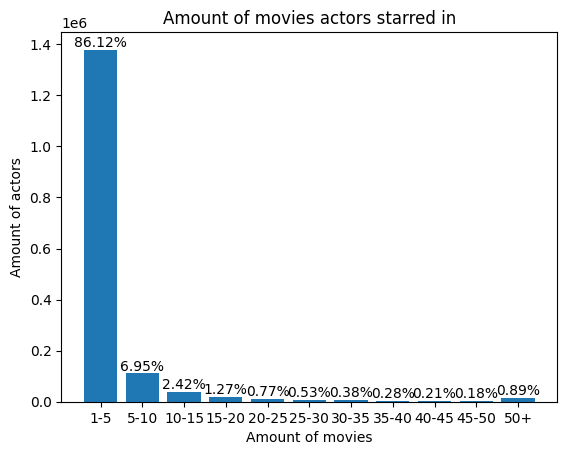

In [10]:
# bar plot of count of movies actors starred in
n1_5 = actors["name"].value_counts()[(actors["name"].value_counts() >= 1) & (actors["name"].value_counts() < 5)].count()
n5_10 = actors["name"].value_counts()[(actors["name"].value_counts() >= 5) & (actors["name"].value_counts() < 10)].count()
n10_15 = actors["name"].value_counts()[(actors["name"].value_counts() >= 10) & (actors["name"].value_counts() < 15)].count()
n15_20 = actors["name"].value_counts()[(actors["name"].value_counts() >= 15) & (actors["name"].value_counts() < 20)].count()
n20_25 = actors["name"].value_counts()[(actors["name"].value_counts() >= 20) & (actors["name"].value_counts() < 25)].count()
n25_30 = actors["name"].value_counts()[(actors["name"].value_counts() >= 25) & (actors["name"].value_counts() < 30)].count()
n30_35 = actors["name"].value_counts()[(actors["name"].value_counts() >= 30) & (actors["name"].value_counts() < 35)].count()
n35_40 = actors["name"].value_counts()[(actors["name"].value_counts() >= 35) & (actors["name"].value_counts() < 40)].count()
n40_45 = actors["name"].value_counts()[(actors["name"].value_counts() >= 40) & (actors["name"].value_counts() < 45)].count()
n45_50 = actors["name"].value_counts()[(actors["name"].value_counts() >= 45) & (actors["name"].value_counts() < 50)].count()
n50_plus = actors["name"].value_counts()[(actors["name"].value_counts() >= 50)].count()

data = {
    "1-5": n1_5,
    "5-10": n5_10,
    "10-15": n10_15,
    "15-20": n15_20,
    "20-25": n20_25,
    "25-30": n25_30,
    "30-35": n30_35,
    "35-40": n35_40,
    "40-45": n40_45,
    "45-50": n45_50,
    "50+": n50_plus
}
# also add percentages
total = actors["name"].value_counts().count()
percentages = {key: value / total * 100 for key, value in data.items()}
print(percentages)

plt.bar(data.keys(), data.values())
plt.xlabel("Amount of movies")
plt.ylabel("Amount of actors")
plt.title("Amount of movies actors starred in")
# add percentages
for key, value in percentages.items():
    plt.text(key, data[key], f"{value:.2f}%", ha="center", va="bottom")
plt.show()


86.12% of actors have starred in 1-5 movies, followed by 6.95% in 5-10 movies. The distribution decreases as the number of movies increases, with 2.42% in 10-15, 1.27% in 15-20, and less than 1% for actors who appeared in 20 or more movies. Only 0.89% of actors have starred in 50 or more movies.

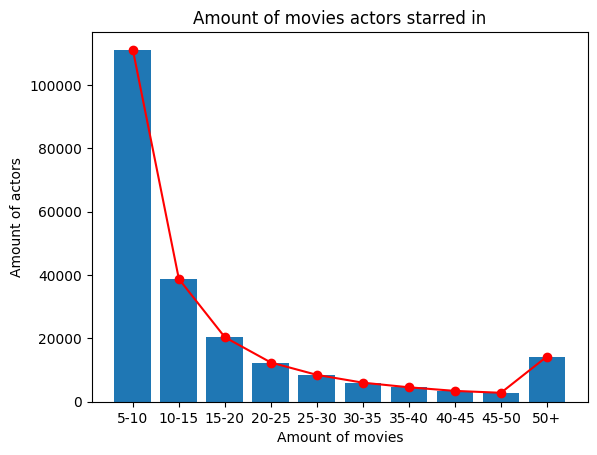

In [11]:
new_data = data.copy()
new_data.pop("1-5")
plt.bar(new_data.keys(), new_data.values())
plt.xlabel("Amount of movies")
plt.ylabel("Amount of actors")
plt.title("Amount of movies actors starred in")
# add line connecting points to show trend
plt.plot(new_data.keys(), new_data.values(), marker="o", color="r")
plt.show()


The number of actors decreases sharply from 5-10 movies, with over 100,000 actors, to around 40,000 in the 10-15 movie range. The trend continues to decline as the number of movies increases, with fewer than 20,000 actors appearing in 20 or more movies. The line plot overlay highlights this decreasing trend, showing a steady drop.


In [12]:
# we enriched the actor names with info about them from imdb
# we focused on actors with 10 or more movies starred in
# we opted for 10.000 random actors from that subset to enrich
# that all was done with the "scrape_imdb.py" and "html_parser_loop.py" scripts
# now we will check the data
# check for missing values
print("missing values: " + actors_enriched.isnull().sum().astype(str))

# check for duplicates
print("duplicates: " + actors_enriched.duplicated().sum().astype(str))

# check for unique values
print("unique: " + actors_enriched.nunique().astype(str))


nconst                  missing values: 0
primaryName             missing values: 0
birthYear               missing values: 0
deathYear               missing values: 0
primaryProfession     missing values: 136
knownForTitles          missing values: 0
gender                missing values: 645
birth_date           missing values: 3205
death_date           missing values: 6873
birth_place          missing values: 2801
death_place          missing values: 6959
death_cause          missing values: 6959
height               missing values: 6382
dtype: object
duplicates: 0
nconst               unique: 9998
primaryName          unique: 9998
birthYear             unique: 164
deathYear             unique: 107
primaryProfession     unique: 767
knownForTitles       unique: 9873
gender                  unique: 2
birth_date           unique: 6235
death_date           unique: 2946
birth_place          unique: 3414
death_place          unique: 1097
death_cause           unique: 357
height            

As you can see there are a lot of missing values that need to be explained:
- out of 10.000 actors we only have no info about 2 of them
- we dont have the birth date for about 1/3 of the actors
- we dont have the birth place for about 1/4 of the actors
- we dont have the height for about 2/3 of the actors

...but this will have to suffice, as scraping and parsing the data took a lot of time.


##  Gender 

In [13]:
# what is the average height of male vs female actors
# remove "m" from "1.75 m" and convert to float
actors_enriched_cp = actors_enriched.copy()
actors_enriched_cp["height"] = actors_enriched_cp["height"].str.replace(" m", "").astype(float)
average_height_male = actors_enriched_cp[actors_enriched_cp["gender"] == "male"]["height"].mean()
print(f"Average height male: {average_height_male}")
average_height_female = actors_enriched_cp[actors_enriched_cp["gender"] == "female"]["height"].mean()
print(f"Average height female: {average_height_female}")

Average height male: 1.7980350378787877
Average height female: 1.657773900907188


In [14]:
# get the most used names, sorted by surname and first name by cutting it by the space between them
actors_enriched_cp["first_name"] = actors_enriched_cp["primaryName"].str.split(" ").str[0]
actors_enriched_cp["surname"] = actors_enriched_cp["primaryName"].str.split(" ").str[1]
top_firstnames = actors_enriched_cp["first_name"].value_counts().head(10)
print(top_firstnames)
top_surnames = actors_enriched_cp["surname"].value_counts().head(10)
print(top_surnames)


first_name
John       123
Robert      99
Michael     85
David       75
Paul        57
Richard     55
Peter       53
James       51
George      36
Jack        33
Name: count, dtype: int64
surname
de          30
Lee         29
Smith       21
von         17
Moore       17
Taylor      16
Brown       16
Wilson      15
De          14
Mitchell    14
Name: count, dtype: int64


In [15]:
# Import the actors data from a CSV file into a DataFrame
actors_imd = pd.read_csv('imdb/actors_imdb.csv')

# Add a new column 'gender' and assign values based on the 'primaryProfession' column.
# If 'primaryProfession' contains 'actor', assign 'Male'; if it contains 'actress', assign 'Female';
# If neither is present, assign None.
actors_imd['gender'] = actors_imd['primaryProfession'].apply(lambda x: 'Male' if 'actor' in x.split(',') else ('Female' if 'actress' in x.split(',') else None))

# Remove rows where the 'gender' column is None (i.e., where gender couldn't be determined)
actors_imd = actors_imd.dropna(subset=['gender'])

In [16]:
# Show the first 10 rows of the DataFrame (Note: This line seems incomplete or misplaced)
actors_imd.head(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,gender
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125",Male
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355",Female
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452",Female
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723",Male
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467",Male
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0036855,tt0038109,tt0038787",Female
6,nm0000007,Humphrey Bogart,1899,1957,"actor,producer,miscellaneous","tt0034583,tt0042593,tt0037382,tt0033870",Male
7,nm0000008,Marlon Brando,1924,2004,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849",Male
8,nm0000009,Richard Burton,1925,1984,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877",Male
9,nm0000010,James Cagney,1899,1986,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0055256",Male


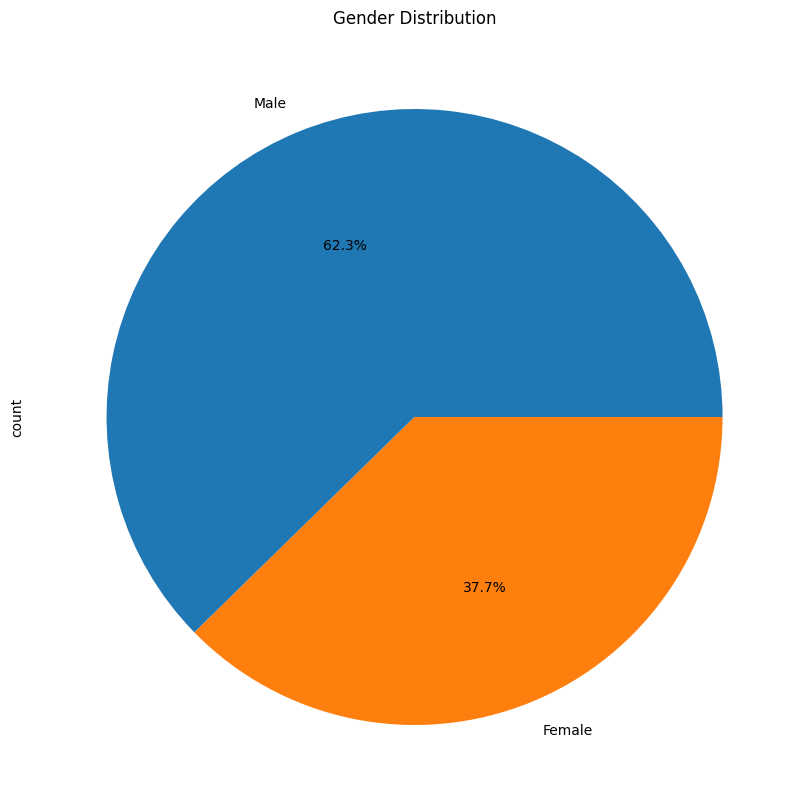

In [17]:
# we want to compare gender in the movie industry
# we will check count of actors
# show percentage in pie chart

counts = actors_imd["gender"].value_counts()
plt.figure(figsize=(10, 10))
actors_imd["gender"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

The pie chart shows the gender distribution of actors, with **62.3% male** and **37.7% female** actors. The chart highlights the predominance of male actors in the dataset compared to female actors.


In [18]:
# Merge the actors DataFrame with another DataFrame 'genres', 
# joining them based on the 'id' column, with a left join to keep all rows from the actors DataFrame
merged_df = actors.merge(genres[['id', 'genre']], left_on='id', right_on='id', how='left')
merged_df

,id,name,role,genre
0,1000001,Margot Robbie,Barbie,Comedy
1,1000001,Margot Robbie,Barbie,Adventure
2,1000001,Ryan Gosling,Ken,Comedy
3,1000001,Ryan Gosling,Ken,Adventure
4,1000001,America Ferrera,Gloria,Comedy
...,...,...,...,...
10210591,1941596,线雨轩,Tata/塔塔,Crime
10210592,1941596,Jiang Yixuan,Zuo Yila（Zoila）/佐伊拉,Action
10210593,1941596,Jiang Yixuan,Zuo Yila（Zoila）/佐伊拉,Crime
10210594,1941597,Hiroshi Mikami,NaN,NaN


In [19]:
# Merge the actors_imd DataFrame with the merged_df, 
# keeping relevant columns ('name', 'id', 'genre'), matching based on the 'primaryName' and 'name' columns
actors_imd = actors_imd.merge(merged_df[["name", "id", "genre"]], left_on="primaryName", right_on="name", how="left")

# Drop unnecessary columns ('nconst', 'primaryName', 'primaryProfession', 'knownForTitles') 
# from the actors_imd DataFrame
actors_imd = actors_imd.drop(columns=['nconst',"primaryName", "primaryProfession", "knownForTitles"])

# Drop rows where 'id' is missing, and convert 'id' to an integer by rounding it
actors_imd = actors_imd.dropna(subset=['id'])
actors_imd["id"] = actors_imd["id"].round().astype(int)

In [20]:
actors_imd

,birthYear,deathYear,gender,name,id,genre
0,1899,1987,Male,Fred Astaire,1002598,Romance
1,1899,1987,Male,Fred Astaire,1002598,Music
2,1899,1987,Male,Fred Astaire,1002598,Comedy
3,1899,1987,Male,Fred Astaire,1003395,Comedy
4,1899,1987,Male,Fred Astaire,1003395,Romance
...,...,...,...,...,...,...
20425890,1996,\N,Female,Apsara Rani,1771483,Action
20425891,1996,\N,Female,Apsara Rani,1771483,Adventure
20425892,\N,\N,Male,Chinmay Mishra,1567309,Drama
20425893,\N,\N,Male,Chinmay Mishra,1567309,Crime


In [21]:
# Count the number of Male and Female actors in the 'gender' column
actors_count = actors_imd['gender'].value_counts()
actors_count

gender
Male      12461519
Female     4456419
Name: count, dtype: int64

In [22]:
# Calculate absolute frequencies for each genre by gender
genre_counts = actors_imd.groupby(['gender', 'genre']).size().unstack(fill_value=0)

# Calculate relative frequencies (percentage) for each genre by gender
# Divides the counts by the row sum to get percentages
genre_counts_relative = genre_counts.div(genre_counts.sum(axis=1), axis=0) * 100

# Display absolute frequencies table
print("Absolute Häufigkeiten:")
print(genre_counts)

# Display realtive frequencies table
print("\nRelative Häufigkeiten (%):")
print(genre_counts_relative)

Absolute Häufigkeiten:
genre   Action  Adventure  Animation   Comedy   Crime  Documentary    Drama  \
gender                                                                        
Female  218137     108785      76566   722018  191859       137711  1103155   
Male    809921     407945     166087  1827593  664566       584269  2726714   

genre   Family  Fantasy  History  Horror   Music  Mystery  Romance  \
gender                                                               
Female  134183    99861    59054  220220  134753   106969   334663   
Male    326167   243855   231292  538806  425550   298535   755410   

genre   Science Fiction  TV Movie  Thriller     War  Western  
gender                                                        
Female            92713    152153    259793   33671    31261  
Male             299106    407409    762266  178534   228304  

Relative Häufigkeiten (%):
genre     Action  Adventure  Animation     Comedy     Crime  Documentary  \
gender                 

In [23]:
# Calculate absolute differences between genders for each genre
# The `diff()` function is used here, followed by absolute values to find the difference between male and female counts
gender_difference_absolute = genre_counts.diff().fillna(0).abs()
gender_difference_relative = genre_counts_relative.diff().fillna(0).abs()

# Ergebnis anzeigen
print("\nAbsolute Unterschiede zwischen den Geschlechtern:")
gender_difference_absolute

print("\nRelative Unterschiede zwischen den Geschlechtern (%):")
print(gender_difference_relative)


Absolute Unterschiede zwischen den Geschlechtern:

Relative Unterschiede zwischen den Geschlechtern (%):
genre     Action  Adventure  Animation    Comedy     Crime  Documentary  \
gender                                                                    
Female  0.000000   0.000000    0.00000  0.000000  0.000000     0.000000   
Male    1.644024   0.853851    0.41766  1.738708  1.043804     1.651916   

genre      Drama    Family   Fantasy   History    Horror     Music  Mystery  \
gender                                                                        
Female  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Male    3.208815  0.436583  0.315514  0.546316  0.687031  0.386296  0.02387   

genre    Romance  Science Fiction  TV Movie  Thriller       War   Western  
gender                                                                     
Female  0.000000         0.000000  0.000000  0.000000  0.000000  0.000000  
Male    1.577633         0.318954  0.178941  0.2

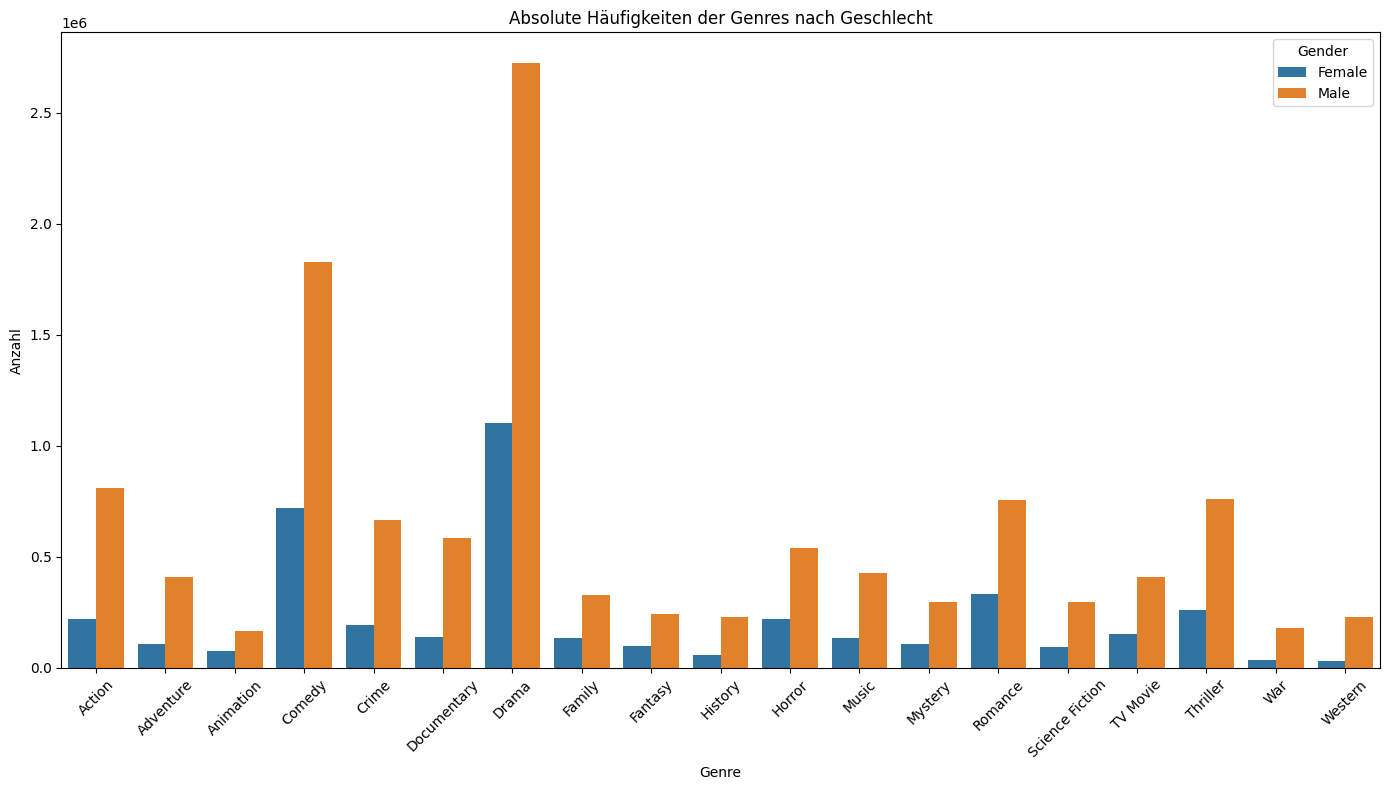

In [24]:
# Convert absolute frequency data into long format for better plotting with Seaborn
genre_counts_melted = genre_counts.reset_index().melt(id_vars='gender', var_name='genre', value_name='count')

# Plot absolute frequencies by genre and gender using a barplot
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_counts_melted, x='genre', y='count', hue='gender')
plt.title('Absolute Häufigkeiten der Genres nach Geschlecht')
plt.xlabel('Genre')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


This bar chart compares the absolute frequencies of genres by gender. Across most genres, male actors (orange bars) appear more frequently than female actors (blue bars), especially in **Drama**, **Comedy**, and **Thriller**. However, in genres like **Documentary** and **Romance**, the difference between male and female actors is less pronounced. The chart highlights a significant gender disparity in the number of male versus female actors across different genres.


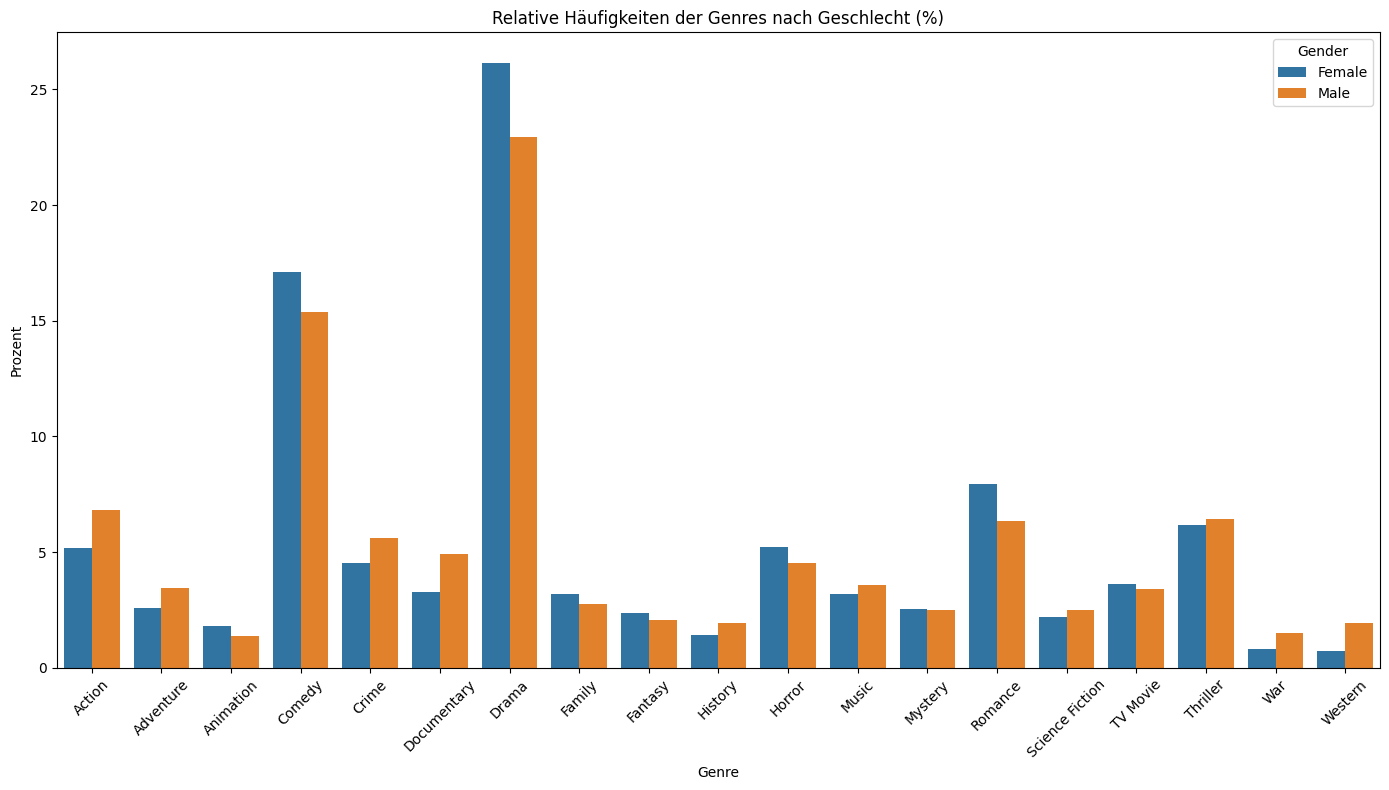

In [25]:
# Convert relative frequency data into long format for Seaborn
genre_counts_relative_melted = genre_counts_relative.reset_index().melt(id_vars='gender', var_name='genre', value_name='percentage')

# Plot relative frequencies by genre and gender using a barplot
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_counts_relative_melted, x='genre', y='percentage', hue='gender')
plt.title('Relative Häufigkeiten der Genres nach Geschlecht (%)')
plt.xlabel('Genre')
plt.ylabel('Prozent')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

This bar chart shows the **relative frequencies of genres by gender** as a percentage. In genres like **Documentary**, **Drama**, and **Comedy**, female actors (blue bars) are more prevalent compared to male actors (orange bars) on a percentage basis. Conversely, in genres such as **Action**, **Crime**, and **Thriller**, male actors dominate. This chart provides insight into the proportional representation of genders across various genres, revealing that while males generally appear more frequently overall, certain genres have a higher relative percentage of female actors.


In [26]:
# Tabular display of absolut frequencies
print("Absolute Häufigkeiten nach Geschlecht und Genre:")
display(genre_counts)

# Tabular display of relative frequencies
print("\nRelative Häufigkeiten nach Geschlecht und Genre (%):")
display(genre_counts_relative)

Absolute Häufigkeiten nach Geschlecht und Genre:


genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
Female,218137,108785,76566,722018,191859,137711,1103155,134183,99861,59054,220220,134753,106969,334663,92713,152153,259793,33671,31261
Male,809921,407945,166087,1827593,664566,584269,2726714,326167,243855,231292,538806,425550,298535,755410,299106,407409,762266,178534,228304



Relative Häufigkeiten nach Geschlecht und Genre (%):


genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
Female,5.172157,2.579356,1.815425,17.119472,4.549090,3.265209,26.156454,3.181558,2.367763,1.400205,5.221546,3.195073,2.536298,7.935057,2.198280,3.607637,6.159845,0.798359,0.741217
Male,6.816181,3.433207,1.397765,15.380764,5.592893,4.917125,22.947639,2.744975,2.052249,1.946521,4.534515,3.581369,2.512428,6.357424,2.517234,3.428697,6.415123,1.502517,1.921374


### Gender Distribution per Country

In [27]:
# Split birth_place into parts
birth_place_parts = actors_enriched['birth_place'].str.split(', ', expand=True)

# If there are three parts, assign them as city, state, and country
three_parts_mask = birth_place_parts[2].notna()
actors_enriched.loc[three_parts_mask, 'birthCity'] = birth_place_parts.loc[three_parts_mask, 0]
actors_enriched.loc[three_parts_mask, 'birthCountry'] = birth_place_parts.loc[three_parts_mask, 2]

# If there are two parts, assign them as city and country
two_parts_mask = ~three_parts_mask
actors_enriched.loc[two_parts_mask, 'birthCity'] = birth_place_parts.loc[two_parts_mask, 0]
actors_enriched.loc[two_parts_mask, 'birthCountry'] = birth_place_parts.loc[two_parts_mask, 1]

# Drop the original birth_place column
actors_qual_enriched = actors_enriched.drop(columns=['birth_place'])

#set UK and United Kingdom to England
actors_qual_enriched['birthCountry'] = actors_qual_enriched['birthCountry'].replace('UK', 'England')
actors_qual_enriched['birthCountry'] = actors_qual_enriched['birthCountry'].replace('United Kingdom', 'England')

# change city and country for actors born in one that has a count of less than 10 to "Other"    
actors_qual_enriched['birthCity'] = actors_qual_enriched['birthCity'].where(actors_qual_enriched['birthCity'].map(actors_qual_enriched['birthCity'].value_counts()) > 1, 'Other')
actors_qual_enriched['birthCountry'] = actors_qual_enriched['birthCountry'].where(actors_qual_enriched['birthCountry'].map(actors_qual_enriched['birthCountry'].value_counts()) > 10, 'Other')

# new york city is in the US
actors_qual_enriched['birthCountry'] = actors_qual_enriched['birthCountry'].replace('New York', 'USA')
actors_qual_enriched

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,gender,birth_date,death_date,death_place,death_cause,height,birthCity,birthCountry
0,nm4699627,Sturgill Simpson,1978,\N,"music_artist,soundtrack,actor","tt5537002,tt8244784,tt11252248,tt11858890",male,1978-06-08,NaN,NaN,NaN,NaN,Jackson,USA
1,nm2903245,Rick Okon,1989,\N,actor,"tt5830254,tt4338336,tt1830792,tt0806910",male,1989-04-13,NaN,NaN,NaN,1.82 m,Other,Germany
2,nm0805709,Bart Slegers,\N,\N,actor,"tt0096961,tt0149534,tt2585160,tt0217205",male,NaN,NaN,NaN,NaN,1.80 m,Other,Other
3,nm2987470,Ana Rujas,1989,\N,"actress,writer,producer","tt8716014,tt20096840,tt13880448,tt6060156",female,1989-05-14,NaN,NaN,NaN,1.72 m,Madrid,Spain
4,nm1508186,Park Hyo-joon,1980,\N,actor,"tt3914520,tt0821442,tt10726604,tt0390205",male,1980-06-12,NaN,NaN,NaN,1.80 m,South Korea,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,nm0927382,Christopher Wiehl,1970,\N,"actor,producer,writer","tt0375411,tt0247082,tt0236041",male,1970-10-29,NaN,NaN,NaN,1.88 m,Yakima,USA
9994,nm3732981,Said Serhan,\N,\N,"actor,script_department,writer","tt26509727,tt11798976,tt7239164,tt5698638",male,NaN,NaN,NaN,NaN,NaN,Other,Other
9995,nm0820828,Clay St. Thomas,\N,\N,actor,"tt1381404,tt0409459,tt1959332,tt0404032",male,NaN,NaN,NaN,NaN,NaN,Other,Other
9996,nm0582417,Ken Metcalfe,\N,\N,actor,tt0057803,male,NaN,NaN,NaN,NaN,NaN,Other,Other


In [28]:
# Calculate the gender distribution by birth country
# Group by 'birthCountry' and 'gender', then use unstack to create separate columns for 'male' and 'female'
# fill_value=0 ensures missing values are replaced with 0
gender_country_distribution = actors_qual_enriched.groupby(['birthCountry', 'gender']).size().unstack(fill_value=0)
# Add a 'total' column that sums up male and female actors for each country
gender_country_distribution['total'] = gender_country_distribution.sum(axis=1)
# Calculate the percentage of female actors for each country
gender_country_distribution['female_percentage'] = (gender_country_distribution['female'] / gender_country_distribution['total']) * 100
# Calculate the percentage of male actors for each country
gender_country_distribution['male_percentage'] = (gender_country_distribution['male'] / gender_country_distribution['total']) * 100

# Create a choropleth world map for female actors using Plotly
fig_female = px.choropleth(
    gender_country_distribution,  # DataFrame with the gender distribution
    locations=gender_country_distribution.index,  # Country names for locations
    locationmode='country names',  # Set location mode to 'country names'
    color='female_percentage',  # Use 'female_percentage' for coloring
    width=1200,  # Set the width of the map
    height=1000,  # Set the height of the map
    hover_name=gender_country_distribution.index,  # Hover text showing country names
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale for female percentages
    title='Percentage of Female Actors by Country',  # Title of the map
    labels={'female_percentage': 'Female (%)'}  # Label for the color bar
)

# Create a choropleth world map for male actors using Plotly
fig_male = px.choropleth(
    gender_country_distribution,  # DataFrame with the gender distribution
    locations=gender_country_distribution.index,  # Country names for locations
    locationmode='country names',  # Set location mode to 'country names'
    color='male_percentage',  # Use 'male_percentage' for coloring
    width=1200,  # Set the width of the map
    height=1000,  # Set the height of the map
    hover_name=gender_country_distribution.index,  # Hover text showing country names
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale for male percentages
    title='Percentage of Male Actors by Country',  # Title of the map
    labels={'male_percentage': 'Male (%)'}  # Label for the color bar
)

# Show the map for female actors
fig_female.show()
# Show the map for male actors
fig_male.show()

The first world map visualizes the **percentage of female actors by country**. The color scale on the right represents the percentage, with yellow indicating higher female representation (over 60%) and dark purple indicating lower representation (around 10%). Countries like Russia and parts of Europe show a lower percentage of female actors, while parts of Asia and south america have higher or more balanced female representation in the acting industry. This map highlights regional differences in gender representation across the globe.

The second world map visualizes it the other way around.

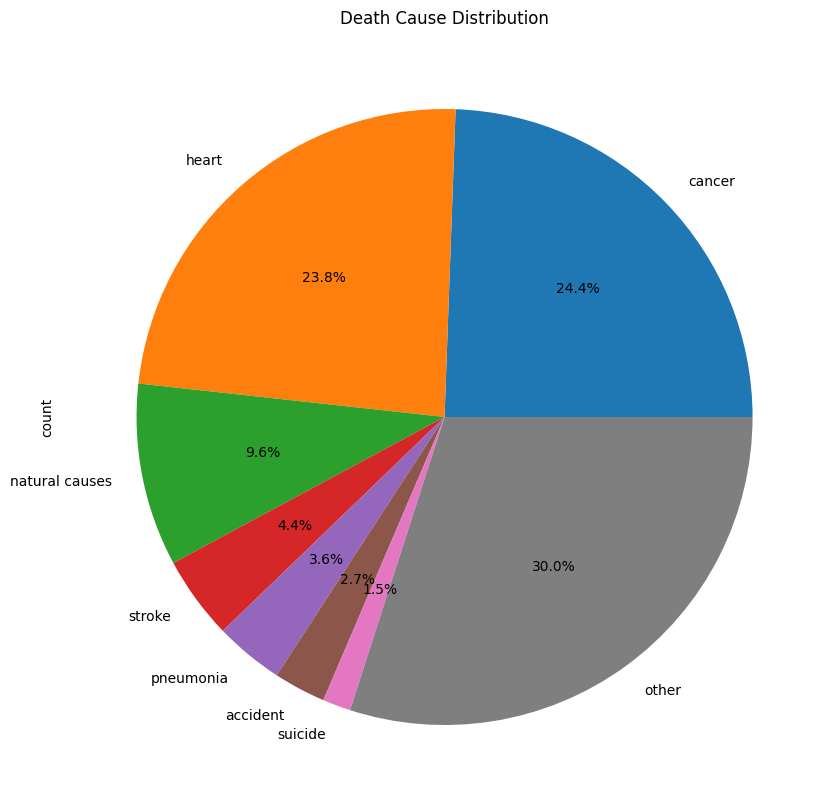

In [29]:
# get the pie chart of death causes
# we will ignore "undisclosed" and None
# we will combine all causes containing "cancer" into one category
# we will combine all causes containing "heart" into one category
# we will comine all causes containing "stroke" into one category
# we will combine all causes containing "accident" into one category
# we will only show causes with more than 30 occurences
# we will show the rest in one category called "other"
actors_enriched_cp = actors_enriched.copy()
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].str.lower()
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "cancer",regex='.*cancer.*')
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "heart",regex='.*heart.*')
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "heart",regex='.*cardiac.*')
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "stroke",regex='.*stroke.*')
actors_enriched_cp["death_cause"] = actors_enriched_cp["death_cause"].replace(None, "accident",regex='.*accident.*')
counts = actors_enriched_cp["death_cause"].value_counts()
counts = counts.drop(["undisclosed"])
counts_high = pd.DataFrame(counts[counts > 15])
other = pd.DataFrame(counts[counts < 15])
other_sum = other.sum()
other_sum = pd.DataFrame(other_sum).T
other_sum.index = ["other"]
counts = pd.concat([counts_high, other_sum]).squeeze()

# show a pie chart with all Death Causes
plt.figure(figsize=(10, 10))
counts.plot.pie(autopct="%1.1f%%")
plt.title("Death Cause Distribution")
plt.show()

This pie chart represents the distribution of death causes. The largest category is **"other"** causes, accounting for 30.0% of the total. **Cancer** is the second most common cause, responsible for 24.4%, followed closely by **heart-related** deaths at 23.8%. **Natural causes** make up 9.6%, and smaller percentages are attributed to **stroke** (4.4%), **pneumonia** (3.6%), **accidents** (2.7%), and **suicide** (1.5%).


In [30]:
# preprocess the data for prediction of the number of movies
actors_qual_prepped =actors_enriched.copy()
# drop columns that are not needed
actors_qual_prepped = actors_qual_prepped.drop(columns=['death_cause','nconst','primaryProfession', 'knownForTitles', 'primaryName', 'birthYear', 'deathYear', 'death_place'])

# split birth date into year, month, day
actors_qual_prepped['birthYear'] = actors_qual_prepped['birth_date'].str.split('-', expand=True)[0]
actors_qual_prepped['birthMonth'] = actors_qual_prepped['birth_date'].str.split('-', expand=True)[1]
actors_qual_prepped['birthDay'] = actors_qual_prepped['birth_date'].str.split('-', expand=True)[2]

# drop birth date
actors_qual_prepped = actors_qual_prepped.drop(columns=['birth_date'])

# if there is no death date, fill it with 0000-00-00
actors_qual_prepped['death_date'] = actors_qual_prepped['death_date'].fillna('0000-00-00')

#split death date into year, month, day if it exists
actors_qual_prepped['deathYear'] = actors_qual_prepped['death_date'].str.split('-', expand=True)[0]
actors_qual_prepped['deathMonth'] = actors_qual_prepped['death_date'].str.split('-', expand=True)[1]
actors_qual_prepped['deathDay'] = actors_qual_prepped['death_date'].str.split('-', expand=True)[2]

# drop death date
actors_qual_prepped = actors_qual_prepped.drop(columns=['death_date'])

107.0
73.85661764705883


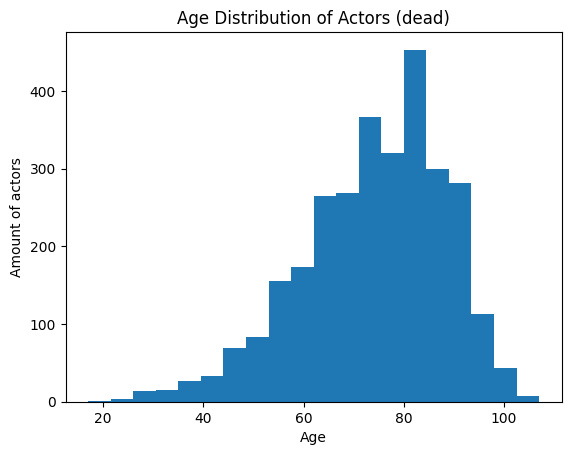

In [31]:
# turn dates into age
actors_qual_prepped['birthYear'] = pd.to_numeric(actors_qual_prepped['birthYear'])
actors_qual_prepped['deathYear'] = pd.to_numeric(actors_qual_prepped['deathYear'])
actors_qual_prepped['birthMonth'] = pd.to_numeric(actors_qual_prepped['birthMonth'])
actors_qual_prepped['deathMonth'] = pd.to_numeric(actors_qual_prepped['deathMonth'])
actors_qual_prepped['birthDay'] = pd.to_numeric(actors_qual_prepped['birthDay'])
actors_qual_prepped['deathDay'] = pd.to_numeric(actors_qual_prepped['deathDay'])

# get max age of actor with a death date
deathdateactors = actors_qual_prepped[actors_qual_prepped['deathYear'] != 0000]
deathdateactors['age'] = deathdateactors['deathYear'] - deathdateactors['birthYear']
deathdateactors['age'] = deathdateactors['age'] + (deathdateactors['deathMonth'] - deathdateactors['birthMonth'])/12
deathdateactors['age'] = deathdateactors['age'] + (deathdateactors['deathDay'] - deathdateactors['birthDay'])/365
deathdateactors['age'] = deathdateactors['age'].round(0)
maxage = deathdateactors['age'].max()
print(maxage)
meanage = deathdateactors['age'].mean()
print(meanage)

plt.hist(deathdateactors['age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Amount of actors")
plt.title("Age Distribution of Actors (dead)")
plt.show()


This histogram shows the **age distribution of deceased actors**. The distribution peaks around the age range of 75-85, where the number of deceased actors exceeds 400. There is a gradual increase starting from around age 40, with a notable rise in the 60-70 age range. The number of actors decreases steadily after 85, with very few actors passing away before 40 or after 100.


107.0
59.20463012240553


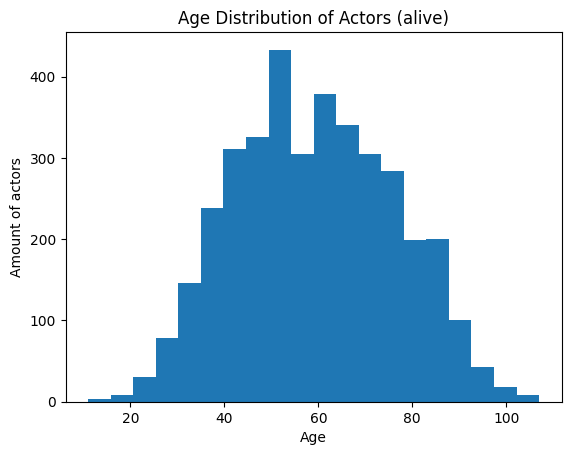

In [32]:
actors_alive = actors_qual_prepped[actors_qual_prepped['deathYear'] == 0000]

# if there is no death date, fill it with today's date to calculate age
actors_alive['deathYear'] = actors_alive['deathYear'].replace(0000, 2024)
actors_alive['deathMonth'] = actors_alive['deathMonth'].replace(00, 8)
actors_alive['deathDay'] = actors_alive['deathDay'].replace(00, 2)

# calculate age
actors_alive['age'] = actors_alive['deathYear'] - actors_alive['birthYear']
actors_alive['age'] = actors_alive['age'] + (actors_alive['deathMonth'] - actors_alive['birthMonth'])/12
actors_alive['age'] = actors_alive['age'] + (actors_alive['deathDay'] - actors_alive['birthDay'])/365

# round age
actors_alive['age'] = actors_alive['age'].round(0)


# remove actors that are older than the oldest actor that died
actors_alive = actors_alive[~((actors_alive['deathYear'] == 2024) & (actors_alive['deathMonth'] == 8) & (actors_alive['deathDay'] == 2) & (actors_alive['age'] > maxage))]


maxage_alive = actors_alive['age'].max()
print(maxage_alive)
meanage_alive = actors_alive['age'].mean()
print(meanage_alive)

# plot age distribution of Actors alive
plt.hist(actors_alive['age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Amount of actors")
plt.title("Age Distribution of Actors (alive)")
plt.show()



This histogram depicts the **age distribution of living actors**. The distribution peaks around the 60-65 age range, with more than 400 actors in that category. There is a relatively even spread from ages 40 to 80, with the number of actors gradually increasing up to the peak and then declining. Few actors are younger than 20 or older than 100, with the distribution forming a symmetric bell shape, indicating a balanced age spread among living actors.


gender                                               male
birth_place     Labuhan Deli, Deli Serdang, North Sumatra
height                                                NaN
birthCity                                    Labuhan Deli
birthCountry                                North Sumatra
birthYear                                          1917.0
birthMonth                                            7.0
birthDay                                             21.0
deathYear                                            2024
deathMonth                                              8
deathDay                                                2
age                                                 107.0
Name: 4092, dtype: object
gender                                  male
birth_place     New York City, New York, USA
height                                1.41 m
birthCity                      New York City
birthCountry                             USA
birthYear                             2013.0
birthMon

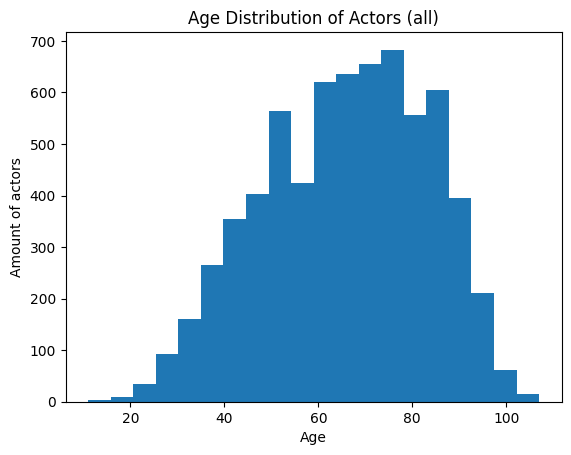

In [33]:

# if there is no death date, fill it with today's date to calculate age
actors_qual_prepped['deathYear'] = actors_qual_prepped['deathYear'].replace(0000, 2024)
actors_qual_prepped['deathMonth'] = actors_qual_prepped['deathMonth'].replace(00, 8)
actors_qual_prepped['deathDay'] = actors_qual_prepped['deathDay'].replace(00, 2)

actors_qual_prepped['age'] = actors_qual_prepped['deathYear'] - actors_qual_prepped['birthYear']
actors_qual_prepped['age'] = actors_qual_prepped['age'] + (actors_qual_prepped['deathMonth'] - actors_qual_prepped['birthMonth'])/12
actors_qual_prepped['age'] = actors_qual_prepped['age'] + (actors_qual_prepped['deathDay'] - actors_qual_prepped['birthDay'])/365

# round age to 0 decimal places
actors_qual_prepped['age'] = actors_qual_prepped['age'].round(0)

# remove actors with death date 2-8-2024 (today's date) that have a higher age than the max age
actors_qual_prepped = actors_qual_prepped[~((actors_qual_prepped['deathYear'] == 2024) & (actors_qual_prepped['deathMonth'] == 8) & (actors_qual_prepped['deathDay'] == 2) & (actors_qual_prepped['age'] > maxage))]

# show row with max and min age
print(actors_qual_prepped.loc[actors_qual_prepped['age'].idxmax()])
print(actors_qual_prepped.loc[actors_qual_prepped['age'].idxmin()])
print(actors_qual_prepped['age'].mean())

# plot age distribution
plt.hist(actors_qual_prepped['age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Amount of actors")
plt.title("Age Distribution of Actors (all)")
plt.show()

This histogram illustrates the **age distribution of all actors (both living and deceased)**. The distribution peaks between the ages of 60-70, where the number of actors reaches nearly 700. The number of actors gradually increases from age 20, with a noticeable rise starting around age 40, and then begins to decline after age 70. Very few actors are under 20 or over 100, creating a bell-shaped curve that reflects a balanced age spread across the entire actor population.


In [34]:
# get average birth place 
actors_places = actors_enriched.copy()


average_birth_place = actors_places['birth_place'].value_counts().idxmax()
print(average_birth_place)

New York City, New York, USA


In [35]:
# get average death place
average_death_place = actors_places['death_place'].value_counts().idxmax()
print(average_death_place)

Los Angeles, California, USA


# Countries
Contains country and the corresponsing movie in the form of "id"

In [36]:
#check data
print(countries.head())

#check datatypes
print(countries.dtypes)

        id      country
0  1000001           UK
1  1000001          USA
2  1000002  South Korea
3  1000003          USA
4  1000004      Germany
id          int64
country    object
dtype: object


In [37]:
# check for missing values
print(countries.isnull().sum())

#check for duplicates
print(countries.duplicated().sum())

#check for unique values
print(countries.nunique()) 

id         0
country    0
dtype: int64
0
id         617192
country       247
dtype: int64


In [38]:
# Get the movies with the most countries involved
# we cant just count the name of movies because the names are not unique, so we need to count the id of the movies and then merge with the movies dataframe
countries_cp = countries.copy()
top_countries_id = countries_cp["id"].value_counts()
top_countries_id = pd.DataFrame(top_countries_id)
top_countries = top_countries_id.merge(movies[["id", "name"]], on="id", how="left")
print(top_countries.head(10))


        id  count                     name
0  1188661     30     Ivory. A Crime Story
1  1116437     26  Somewhere Else Tomorrow
2  1106357     26                   Sacred
3  1038152     25        Visions of Europe
4  1181951     25            Train Station
5  1748240     23        El Mundo En Pausa
6  1112823     23                   Pelada
7  1677424     23        Eye of the future
8  1509710     20                 Kenopsia
9  1234484     20       El cine es nuestro


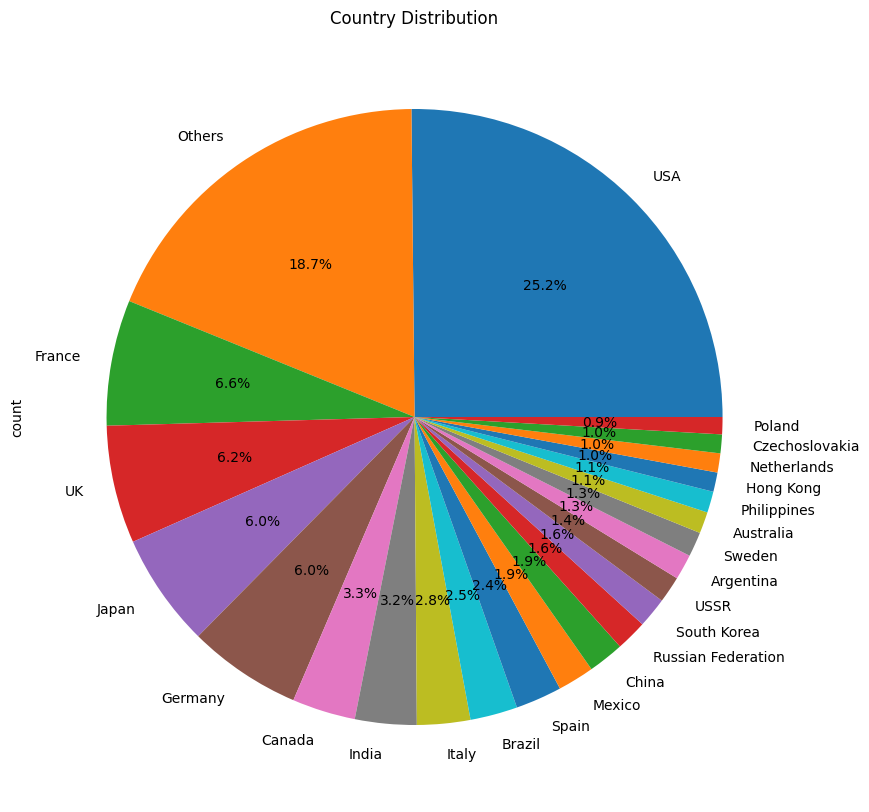

In [39]:
# show count of countries in pie chart
# combine all countries with less than 553787/100 (1%) movies into "Others"
countries_cp = countries.copy()
count = countries_cp.nunique()[0]
countries_cp_highcount = countries_cp.groupby("country").filter(lambda x: len(x) > count/100)
countries_cp_lowcount = countries_cp.groupby("country").filter(lambda x: len(x) <= count/100)
countries_cp_lowcount["country"] = "Others"
countries_cp = pd.concat([countries_cp_highcount, countries_cp_lowcount])
plt.figure(figsize=(10, 10))
countries_cp["country"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Country Distribution")
plt.show()


This pie chart shows the **distribution of actors by country**. The largest segment represents the **USA**, with 25.2% of actors. The **"Others"** category, accounting for various countries not individually listed, makes up 18.7%. Other notable countries include **France** (6.6%), the **UK** (6.2%), **Japan** (6.0%), and **Germany** (6.0%). A variety of other countries contribute smaller percentages, each under 5%, including **Canada**, **India**, **Italy**, **Brazil**, and **Spain**, with even smaller slices for countries like **Poland**, **Australia**, and **Mexico**.


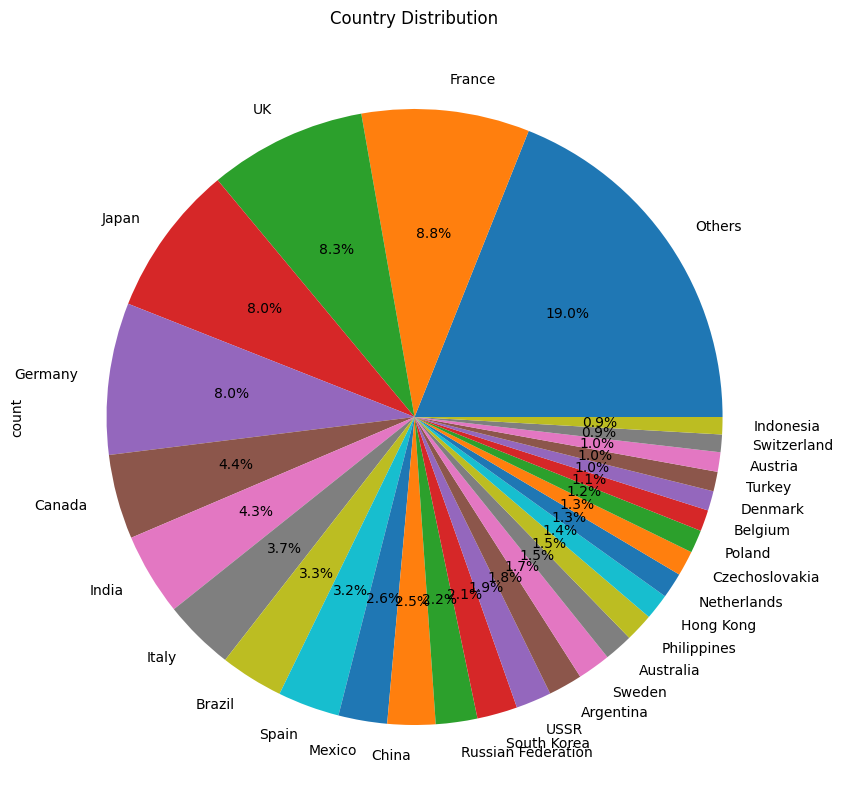

In [40]:
# USA has the most movies, so how do the percentages look like without USA?
countries_cp = countries.copy()
countries_cp = countries_cp[countries_cp["country"] != "USA"]
count = countries_cp.nunique()[0]
countries_cp_highcount = countries_cp.groupby("country").filter(lambda x: len(x) > (count/100))
countries_cp_lowcount = countries_cp.groupby("country").filter(lambda x: len(x) <= (count/100))
countries_cp_lowcount["country"] = "Others"
countries_cp = pd.concat([countries_cp_highcount, countries_cp_lowcount])
plt.figure(figsize=(10, 10))
countries_cp["country"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Country Distribution")
plt.show()

This pie chart represents the **country distribution of actors excluding the USA**. The largest portion, **"Others"**, accounts for 19.0% of actors from various countries not individually listed. **France** leads with 8.8%, followed by the **UK** (8.8%), **Japan** (8.3%), **Germany** (8.0%), and **Canada** (4.4%). Other notable countries include **India** (4.3%), **Italy** (3.7%), and **Brazil** (3.3%). The remaining countries contribute smaller percentages, with each contributing less than 3%, such as **Spain**, **Mexico**, **China**, **Argentina**, and **South Korea**.


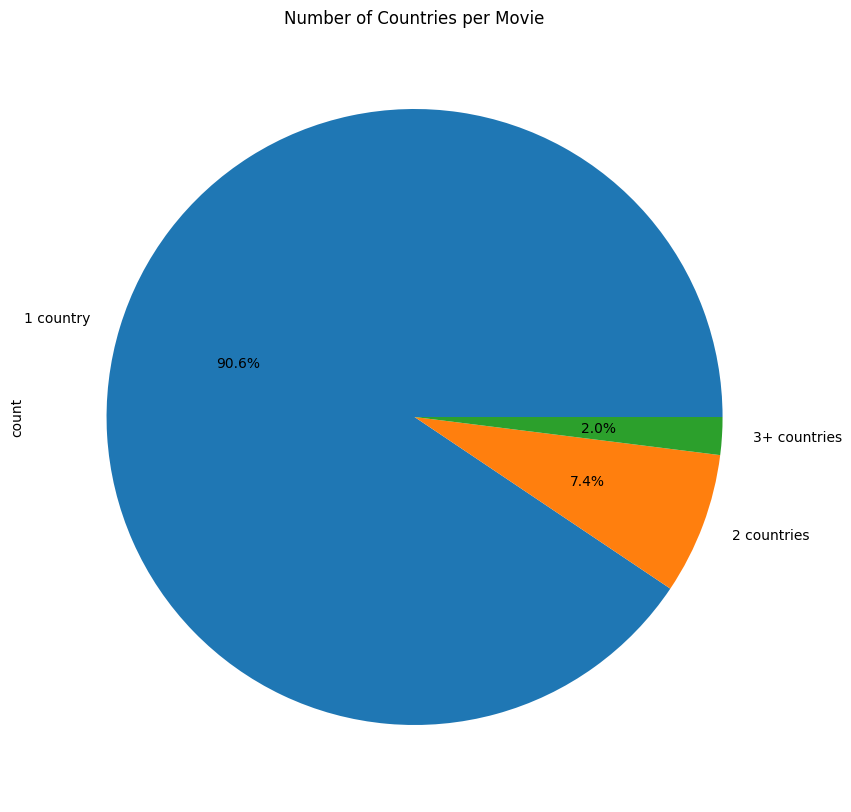

In [41]:
# movies with multiple countries
# if a movies has multiple countries, it will have multiple rows in the dataframe
# we can count the number of countries per movie and show it as a pie chart
countries_cp = countries.copy()
countries_cp_idcounts = countries_cp["id"].value_counts()
count_df = pd.DataFrame(countries_cp_idcounts)
count_df = count_df.rename(columns={"id": "count"})

# summarize the number of countries for count(id) >= 3
count_df["count"] = count_df["count"].apply(lambda x: x if x < 3 else 3)

# change df to series
countries_cp_idcounts = count_df["count"].value_counts()

# show the number of countries per movie in pie chart
# change labels to "1 country", "2 countries", "3+ countries"
plt.figure(figsize=(10, 10))
countries_cp_idcounts = countries_cp_idcounts.rename(index={1: "1 country", 2: "2 countries", 3: "3+ countries"})
countries_cp_idcounts.plot.pie(autopct="%1.1f%%")
plt.title("Number of Countries per Movie")
plt.show()


This pie chart represents the **number of countries involved per movie**. A vast majority of movies (90.6%) are produced in **1 country**. **7.4%** of movies are co-productions between **2 countries**, while only **2.0%** of movies involve **3 or more countries**.


In [42]:
# Group the data by 'country' to calculate the number of movies produced per country
country_counts = countries.groupby('country').size().reset_index(name='movie_count')

## Distribution of Number of Movies by Country

In [43]:
# Create a choropleth map using Plotly to show the number of movies by country
fig = px.choropleth(
    country_counts,  # DataFrame containing country and movie count data
    locations='country',  # Column specifying country names
    locationmode='country names',  # Use country names for location
    color='movie_count',  # Color the countries based on the number of movies
    color_continuous_scale='Magma_r',  # Use the 'Magma' color scale in reverse
    title='Number of Movies by Country'  # Title for the map
)

# Update the colorbar title for clarity
fig.update_layout(
    coloraxis_colorbar=dict(title='Number of Movies')
)


# Adjust the size of the map for better readability
fig.update_layout(
    width=1500,  # Set the width to 1500px
    height=800,  # Set the height to 800px
)

# Display the map showing the number of movies by country
fig.show()

This world map visualizes the **number of movies produced by each country**. The color scale on the right indicates the number of movies, ranging from light yellow (fewer movies) to dark black (a higher number of movies). The **USA** stands out with the highest number of movies, represented in black, indicating over 160k productions. Other countries with significant movie production include **France**, **Germany**, **Japan**, **India**, and **Canada**, shown in shades of orange and red. The rest of the world, shown in lighter yellow, contributes fewer movie productions.


## Distribution of Number of Movies by Country (excluding USA)

In [44]:
# Exclude the USA from the dataset for further analysis
filtered_country_counts = country_counts[country_counts['country'] != 'USA']

# Create another choropleth map excluding the USA, to visualize the number of movies produced by other countries
fig = px.choropleth(
    filtered_country_counts,  # Filtered DataFrame without USA
    locations='country',  # Country names for locations
    locationmode='country names',  # Use country names for location
    color='movie_count',  # Color countries based on the number of movies
    color_continuous_scale='Magma_r',  # Use the 'Magma' color scale in reverse
    title='Number of Movies by Country [Excluding USA]'  # Updated title reflecting the exclusion of USA
)

# Update the colorbar title
fig.update_layout(
    coloraxis_colorbar=dict(title='Number of Movies')
)

# Adjust the map size for the second choropleth
fig.update_layout(
    width=1500,  # Set width to 1500px
    height=800,  # Set height to 800px
)

# Display the second map excluding USA
fig.show()

This world map visualizes the **number of movies produced by each country, excluding the USA**. The color scale on the right shows the number of movies, with darker colors indicating higher production numbers. **India**, **Germany**, **France**, and **Japan** are among the top movie-producing countries, represented in darker shades, with production numbers around 30-45k. Other notable contributors include **Canada**, **Brazil**, and **Italy**. Lighter shades represent countries with fewer movie productions, particularly in regions like Africa, Southeast Asia, and parts of Eastern Europe.


In [45]:
# show the forst 5 rows
country_counts.head()

,country,movie_count
0,Afghanistan,212
1,Albania,390
2,Algeria,513
3,American Samoa,6
4,Andorra,25


### Mapping countries to the continents

In [46]:
# mapping for Countries to continents
country_to_continent = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'North America',
    'Antarctica': 'Antarctica',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bermuda': 'North America',
    'Bhutan': 'Asia',
    'Bolivarian Republic of Venezuela': 'South America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Bouvet Island': 'Antarctica',
    'Brazil': 'South America',
    'British Indian Ocean Territory': 'Asia',
    'British Virgin Islands': 'North America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cape Verde': 'Africa',
    'Cayman Islands': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Christmas Island': 'Asia',
    'Cocos (Keeling) Islands': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Czechoslovakia': 'Europe',
    'Democratic Republic of Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'East Germany': 'Europe',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Falkland Islands': 'South America',
    'Faroe Islands': 'Europe',
    'Federated States of Micronesia': 'Oceania',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Guiana': 'South America',
    'French Polynesia': 'Oceania',
    'French Southern Territories': 'Antarctica',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Greece': 'Europe',
    'Greenland': 'North America',
    'Grenada': 'North America',
    'Guadeloupe': 'North America',
    'Guam': 'Oceania',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Heard Island and McDonald Islands': 'Antarctica',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Ivory Coast': 'Africa',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kosovo': 'Europe',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    "Lao People's Democratic Republic": 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'North America',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'North America',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'North America',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'Netherlands Antilles': 'North America',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'Norfolk Island': 'Oceania',
    'North Korea': 'Asia',
    'North Macedonia': 'Europe',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Pitcairn': 'Oceania',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Réunion': 'Africa',
    'Saint Helena, Ascension and Tristan da Cunha': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Pierre and Miquelon': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Serbia and Montenegro': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Georgia and the South Sandwich Islands': 'Antarctica',
    'South Korea': 'Asia',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'State of Palestine': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Svalbard and Jan Mayen': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania',
    'UK': 'Europe',
    'US Virgin Islands': 'North America',
    'USA': 'North America',
    'USSR': 'Europe',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Republic of Tanzania': 'Africa',
    'United States Minor Outlying Islands': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Vatican City': 'Europe',
    'Vietnam': 'Asia',
    'Wallis and Futuna': 'Oceania',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Yugoslavia': 'Europe',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

In [47]:
# Calculate the total number of movies across all countries
total_movies = country_counts['movie_count'].sum()
# Add a new column to the DataFrame for the percentage of movies produced by each country
country_counts['percentage'] = (country_counts['movie_count'] / total_movies) * 100
# Map each country to its corresponding continent (assuming you have a `country_to_continent` mapping)
country_counts['continent'] = country_counts['country'].map(country_to_continent)

In [48]:
#show first 5 rows
country_counts.head()

,country,movie_count,percentage,continent
0,Afghanistan,212,0.030571,Asia
1,Albania,390,0.056238,Europe
2,Algeria,513,0.073975,Africa
3,American Samoa,6,0.000865,Oceania
4,Andorra,25,0.003605,Europe


## Distribution of Movies by Continent

In [49]:
# Create a sunburst chart to visualize the percentage of movies produced by continent and country
fig = px.sunburst(
    country_counts,  # DataFrame containing country, continent, and percentage data
    path=['continent', 'country'],  # Path to create the hierarchical structure (continent -> country)
    values='percentage',  # Use 'percentage' as the value to visualize in the sunburst
    title='Percentage of Movies Produced by Continent and Country',  # Title for the sunburst
    hover_data={'percentage': ':.3'}  # Format hover data to show percentage with 3 decimal places
)

# Adjust the layout of the sunburst chart
fig.update_layout(
    width=1500,  # Set the width to 1500px
    height=800,  # Set the height to 800px
)

# Display the sunburst chart
fig.show()

This sunburst chart illustrates the **percentage of movies produced by continent and country**. The outer segments represent individual countries, while the inner segments represent continents. The **USA** dominates the chart, taking up a large portion of the **North America** section. **Europe** is represented by several countries, with **France**, **Germany**, **UK**, and **Italy** contributing significantly. In **Asia**, **India** and **Japan** are the largest movie producers. Other continents like **South America**, **Africa**, and **Oceania** are represented by smaller slices, with notable countries like **Brazil**, **Argentina**, and **Australia**.


## Genres

In [50]:
# Show the head of the 'countries' DataFrame to preview the country data
countries.head()

,id,country
0,1000001,UK
1,1000001,USA
2,1000002,South Korea
3,1000003,USA
4,1000004,Germany


In [51]:
# Count the occurrences of each genre and reset the index to create a new DataFrame
genre_counts = genres['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']  # Rename columns to 'Genre' and 'Count'

# Create a pie chart to visualize the distribution of movie genres
fig = px.pie(genre_counts, values='Count', names='Genre', title='Movie Genres Distribution')
fig.show()  # Display the pie chart

This pie chart represents the **distribution of movie genres**. **Drama** is the most common genre, making up **22.2%** of the total. **Documentary** follows with **15.7%**, and **Comedy** accounts for **13.4%**. Other notable genres include **Animation** (5.61%), **Horror** (4.92%), **Romance** (4.46%), and **Thriller** (4.21%). Smaller genres, such as **Music**, **Action**, **Crime**, and **Fantasy**, each make up less than 3% of the total distribution. The chart highlights the prevalence of dramatic and documentary films compared to other genres.


In [52]:
# Merge the genres DataFrame with the countries DataFrame to associate genres with countries
merged_df = pd.merge(genres, countries, on='id')

# Group the data by 'country' and 'genre', and count the number of occurrences for each genre in each country
grouped_df = merged_df.groupby(['country', 'genre']).size().reset_index(name='count')

# Identify the genre with the highest count in each country
idx = grouped_df.groupby(['country'])['count'].transform(max) == grouped_df['count']
highest_count_genres = grouped_df[idx]  # Filter rows where the count is the highest per country

# Calculate the total number of movies produced per country
total_movies_per_country = grouped_df.groupby('country')['count'].sum()

# Calculate the percentage that the most popular genre represents for each country
highest_count_genres['percentage'] = highest_count_genres.apply(
    lambda row: (row['count'] / total_movies_per_country[row['country']]) * 100,
    axis=1
)
highest_count_genres['percentage'] = highest_count_genres['percentage'].round(2)  # Round percentages

In [53]:
# Assuming genres and countries are already defined
merged_df = pd.merge(genres, countries, on='id')
grouped_df = merged_df.groupby(['country', 'genre']).size().reset_index(name='count')

# Rank genres within each country
grouped_df['rank'] = grouped_df.groupby('country')['count'].rank(method='first', ascending=False)

# Filter for the second most popular genre
second_most_popular_genres = grouped_df[grouped_df['rank'] == 2]

# Calculate total movies per country
total_movies_per_country = grouped_df.groupby('country')['count'].sum()

# Calculate percentage
second_most_popular_genres['percentage'] = second_most_popular_genres.apply(
    lambda row: (row['count'] / total_movies_per_country[row['country']]) * 100,
    axis=1
)
second_most_popular_genres['percentage'] = second_most_popular_genres['percentage'].round(2)

# Display the result
print(second_most_popular_genres)

             country        genre  count  rank  percentage
6        Afghanistan        Drama     57   2.0       26.76
31           Albania          War     60   2.0       10.24
38           Algeria  Documentary    150   2.0       22.03
53    American Samoa        Drama      1   2.0       16.67
69           Andorra     Thriller      5   2.0       13.89
...              ...          ...    ...   ...         ...
3158  Western Sahara        Drama      1   2.0       25.00
3160           Yemen        Drama      9   2.0       32.14
3170      Yugoslavia  Documentary    487   2.0       13.52
3188          Zambia        Drama     12   2.0       23.08
3202        Zimbabwe        Drama     24   2.0       27.59

[238 rows x 5 columns]


In [54]:
# Create a choropleth map to visualize the most popular genre by country
fig = px.choropleth(
    highest_count_genres,  # DataFrame with most popular genres
    locations='country',  # Country names for mapping
    locationmode='country names',  # Mapping based on country names
    color='genre',  # Color based on the most popular genre
    title='Genre with Highest Count by Country',  # Title of the map
    hover_data=['count', 'percentage'],  # Show count and percentage on hover
    color_discrete_sequence=px.colors.qualitative.Set2  # Set color scheme for the genres
)

# Customize the layout of the map
fig.update_layout(
    coloraxis_colorbar=dict(title='Genre'),  # Add colorbar title
    width=1500,  # Set width of the map
    height=800,  # Set height of the map
)

# Display the map
fig.show()

This world map highlights the **dominant movie genres by country**. The color key on the right indicates the genre associated with each country. **Drama** (orange) dominates most countries across North America, Europe, Asia, and parts of South America. **Documentary** (green) is prevalent in some countries in Africa, South America, and Oceania. **Comedy**, **Action**, **Romance**, **Horror**, and other genres don't appear and are less widespread than Drama and Documentary.


In [55]:
# Create a choropleth map to visualize the second most popular genre by country
fig = px.choropleth(
    second_most_popular_genres,  # DataFrame with second most popular genres
    locations='country',  # Country names for mapping
    locationmode='country names',  # Mapping based on country names
    color='genre',  # Color based on the second most popular genre
    title='Second Most Popular Genre by Country',  # Title of the map
    hover_data=['count', 'percentage'],  # Show count and percentage on hover
    color_discrete_sequence=px.colors.qualitative.Set2  # Set color scheme for the genres
)

# Customize the layout of the map
fig.update_layout(
    coloraxis_colorbar=dict(title='Genre'),  # Add colorbar title
    width=1500,  # Set width of the map
    height=800,  # Set height of the map
)

# Display the map
fig.show()

This world map shows the **second most popular movie genre by country**. The legend on the right identifies the genres associated with each country. **Documentary** (green) and **Drama** (blue) are common secondary genres in many countries across North America, Europe, and Africa. **Comedy** (yellow) appears as the second most popular genre in countries like the USA, parts of Asia and Europe. Other genres like **War** (orange), **Thriller** (purple), **Music**, **Crime**, **Action**, and **Romance** appear in various countries, indicating a diverse range of secondary preferences globally.


## Themes

In [56]:
# Preview the first few rows of the themes DataFrame
themes.head()

,id,theme
0,1000001,Humanity and the world around us
1,1000001,Crude humor and satire
2,1000001,Moving relationship stories
3,1000001,Emotional and captivating fantasy storytelling
4,1000001,Surreal and thought-provoking visions of life ...


In [57]:
# Merge the themes DataFrame with the countries DataFrame based on 'id'
merged_df = pd.merge(themes, countries, on='id')

# Group the data by 'country' and 'theme', counting the number of occurrences for each theme in each country
grouped_df = merged_df.groupby(['country', 'theme']).size().reset_index(name='count')

# Identify the theme with the highest count in each country
idx = grouped_df.groupby(['country'])['count'].transform(max) == grouped_df['count']
highest_count_themes = grouped_df[idx]  # Filter the rows where the count is the highest for each country

# Calculate the total number of movies produced per country
total_movies_per_country = grouped_df.groupby('country')['count'].sum()

# Calculate the percentage that the most popular theme represents for each country
highest_count_themes['percentage'] = highest_count_themes.apply(
    lambda row: (row['count'] / total_movies_per_country[row['country']]) * 100,
    axis=1
)

In [58]:
# Sort values by country, count, and theme, keeping the highest count and alphabetical order for theme names
highest_count_themes = highest_count_themes.sort_values(
    ['country', 'count', 'theme'], ascending=[True, False, True]
).drop_duplicates(subset=['country'])

In [59]:
highest_count_themes.head()

,country,theme,count,percentage
11,Afghanistan,"Politics, propaganda, and political documentaries",2,11.764706
16,Albania,"Creepy, chilling, and terrifying horror",1,7.692308
34,Algeria,Military combat and heroic soldiers,3,12.500000
42,Angola,Humanity and the world around us,1,25.000000
46,Antarctica,Emotional and captivating fantasy storytelling,1,50.000000


## Most Popular Themes across the countries of the World

In [60]:
# Create a choropleth map to visualize the most popular themes by country
fig = px.choropleth(
    highest_count_themes,  # DataFrame containing the highest count themes
    locations='country',  # Country names to map
    locationmode='country names',  # Mapping based on country names
    color='theme',  # The color is based on the most popular theme for each country
    title='Themes with Highest Count by Country',  # Title of the map
    hover_data=['count', 'percentage'],  # Display count and percentage on hover
    color_discrete_sequence=px.colors.qualitative.Set2  # Define the color scheme
)


# Customize the layout of the map
fig.update_layout(
    coloraxis_colorbar=dict(title='Genre'),  # Add colorbar title
    width=1500,  # Set the width of the map
    height=800,  # Set the height of the map
)

# Display the map
fig.show()


This world map shows the **dominant movie themes by country**. The color key on the right represents a wide variety of themes, such as **politics and human rights**, **creepy horror**, **military combat**, **emotional family dramas**, **musical comedy**, and **action-packed heroes vs. villains**. Different countries are associated with distinct themes. For example, much of **Europe** is highlighted with themes like **politics**, **emotional dramas**,**moving relationships**, and **history**, while parts of **South America** and **Africa** focus on **heroic adventures** and **family drama**. This map visually reflects how movie themes vary significantly by region.


## Releases

In [61]:
# Preview the first few rows of the releases DataFrame
releases.head()

,id,country,date,type,rating
0,1000001,Andorra,2023-07-21,Theatrical,NaN
1,1000001,Argentina,2023-07-20,Theatrical,ATP
2,1000001,Australia,2023-07-19,Theatrical,PG
3,1000001,Australia,2023-10-01,Digital,PG
4,1000001,Austria,2023-07-20,Theatrical,NaN


### Distribution of release types

In [62]:
# Count the occurrences of each release type
type_counts = releases['type'].value_counts()

# Create a pie chart to show the distribution of release types
fig = px.pie(type_counts, values=type_counts.values, names=type_counts.index, title='Distribution of Release Types')

# Display the pie chart
fig.show()


This pie chart illustrates the **distribution of movie release types**. The largest portion, **56.3%**, represents **Theatrical** releases. **Premiere** releases account for **14.9%**, followed by **Digital** at **12.8%**. Other release types include **TV** (6.58%), **Physical** (5.99%), and **Theatrical limited** releases, which make up **3.5%** of the total. The chart highlights the dominance of traditional theatrical releases in comparison to other methods.


### Popular Release Types across the World

In [63]:
# Group the data by 'country' and 'type', counting the number of occurrences of each type in each country
grouped_df = releases.groupby(['country', 'type']).size().reset_index(name='count')

# Identify the most frequent release type in each country
idx = grouped_df.groupby(['country'])['count'].transform(max) == grouped_df['count']
highest_count_releases = grouped_df[idx]  # Filter to keep only the release type with the highest count per country

# Calculate the total number of movies produced per country
total_movies_per_country = grouped_df.groupby('country')['count'].sum()

# Calculate the percentage of the most popular release type in each country
highest_count_releases['percentage'] = highest_count_releases.apply(
    lambda row: (row['count'] / total_movies_per_country[row['country']]) * 100,
    axis=1
)
highest_count_releases['percentage'] = highest_count_releases['percentage'].round(2)


In [64]:
# Create a choropleth map to visualize the most popular release types by country
fig = px.choropleth(
    highest_count_releases,  # DataFrame containing the highest count release types
    locations='country',  # Country names to map
    locationmode='country names',  # Use country names for the map
    color='type',  # Color each country based on the most popular release type
    title='Most popular Release Types across the World',  # Title of the map
    hover_data=['count', 'percentage'],  # Display count and percentage on hover
    color_discrete_sequence=px.colors.qualitative.Set2  # Use a specific color scheme
)

# Customize the layout of the map
fig.update_layout(
    coloraxis_colorbar=dict(title='Release Type'),  # Add colorbar title
    width=1500,  # Set the width of the map
    height=800,  # Set the height of the map
)

# Display the map
fig.show()


This world map shows the **distribution of movie release types by country**. The map uses two color categories: **Theatrical** (green) and **Digital** (orange). The majority of countries, including much of **Europe**, **Asia**, **North America**, and **South America**, primarily use **Theatrical** releases. In contrast, many countries in **Africa** and a few in **South America** and **Oceania** favor **Digital** releases. This map highlights regional preferences for release formats across the globe.


## Languages

In [65]:
# Display the first few rows of the languages DataFrame to inspect the data
languages.head()

,id,type,language
0,1000001,Language,English
1,1000002,Primary language,Korean
2,1000002,Spoken language,English
3,1000002,Spoken language,German
4,1000002,Spoken language,Korean


In [66]:
# Merge the themes DataFrame with the countries DataFrame using 'id' as the key
merged_df = pd.merge(themes, countries, on='id')

# Group the merged DataFrame by 'country' and 'theme', then count the number of occurrences for each theme in each country
grouped_df = merged_df.groupby(['country', 'theme']).size().reset_index(name='count')

# Calculate the number of unique languages in the languages DataFrame
languages["language"].nunique()

192

In [67]:
# Merge the languages DataFrame with the countries DataFrame using 'id' as the key
merged_df = pd.merge(languages, countries, on='id')

# Group the merged DataFrame by 'country' and 'language', then count the number of occurrences for each language in each country
grouped_df = merged_df.groupby(['country', 'language']).size().reset_index(name='count')

# Find the most common language (with the highest count) in each country
idx = grouped_df.groupby(['country'])['count'].transform(max) == grouped_df['count']

# Extract only the rows with the highest language count for each country
highest_count_languages = grouped_df[idx]

# Calculate the total number of movies produced in each country
total_movies_per_country = grouped_df.groupby('country')['count'].sum()

# Add a new column 'percentage' to show what proportion of movies in each country are in the most common language
highest_count_languages['percentage'] = highest_count_languages.apply(
    lambda row: (row['count'] / total_movies_per_country[row['country']]) * 100,
    axis=1
)

# Round the percentages to 2 decimal places for cleaner presentation
highest_count_languages['percentage'] = highest_count_languages['percentage'].round(2)


### Most Popular Movie Languages across the World

In [3]:
# Create a list of unique languages from the DataFrame
languages = list(highest_count_languages["language"].unique())

# Generate a color palette using Seaborn's 'hls' (hue-lightness-saturation) color scheme for the languages
colors = sns.color_palette("hls", len(languages))

# Function to convert an RGB color tuple to a hexadecimal string (required for Plotly color formatting)
def rgb_to_hex(rgb):
    """Converts an RGB tuple to hexadecimal."""
    return '#%02x%02x%02x' % tuple(int(255 * x) for x in rgb)

# Convert the RGB colors to hexadecimal format and store them in a dictionary
language_colors_hex = {language: rgb_to_hex(color) for language, color in colors.items()}

NameError: name 'highest_count_languages' is not defined

In [87]:
# Create a choropleth map using Plotly to visualize the most common movie languages by country
fig = px.choropleth(
    highest_count_languages,  # DataFrame containing the data
    locations='country',  # Country column for the locations
    locationmode='country names',  # Use country names for mapping
    color='language',  # Color the countries based on the most common movie language
    title='Most Popular Movie Languages across the World',  # Title for the map
    hover_data=['count', 'percentage'],  # Additional data on hover (movie count and percentage)
    color_discrete_map=language_colors_hex  # Custom color mapping for languages
)

# Customize the colorbar title and adjust the map layout
fig.update_layout(
    coloraxis_colorbar=dict(title='Release Type'),  # Set the colorbar title
    width=1500,  # Set the map width
    height=800,  # Set the map height
)

# Display the choropleth map
fig.show()

This world map shows the **most popular movie languages by country**. The color legend on the right displays the various languages associated with each region. **English** (orange) dominates North America, Australia, and parts of Africa. **Spanish** (light brown) is prevalent in Latin America, while **French** (yellow) appears in parts of Europe and Africa. **Russian** (green) is dominant in Russia and surrounding countries, and **Arabic** (light pink) is common in parts of the Middle East and North Africa. Other languages, such as **Portuguese**, **Chinese**, **German**, and **Hindi**, also feature prominently in their respective regions.


## Studios

In [89]:
# Display the first few rows of the studios DataFrame to inspect the data
studios.head()

,id,studio
0,1000001,LuckyChap Entertainment
1,1000001,Heyday Films
2,1000001,NB/GG Pictures
3,1000001,Mattel
4,1000001,Warner Bros. Pictures


In [90]:
# Merge the studios dataset with the countries dataset using the 'id' column as the key
merged_df = pd.merge(studios, countries, on='id')

# Group by 'country' and 'studio', then count the number of movies for each studio in each country
grouped_df = merged_df.groupby(['country', 'studio']).size().reset_index(name='count')

# Find the studio with the highest movie count in each country
# The condition selects rows where the count is the maximum for that country
idx = grouped_df.groupby(['country'])['count'].transform(max) == grouped_df['count']

# Extract only the rows with the highest count for each country (most popular studio)
highest_count_studios = grouped_df[idx]

# Calculate the total number of movies produced in each country (for percentage calculation)
total_movies_per_country = grouped_df.groupby('country')['count'].sum()

# Add a new column 'percentage' that represents the proportion of movies produced by the most popular studio
highest_count_studios['percentage'] = highest_count_studios.apply(
    lambda row: (row['count'] / total_movies_per_country[row['country']]) * 100,
    axis=1
)

# Round the percentage values to 2 decimal places for cleaner presentation
highest_count_studios['percentage'] = highest_count_studios['percentage'].round(2)

In [91]:
# Create a list of unique studios from the DataFrame
studios = list(highest_count_studios["studio"].unique())

# Generate a color palette for the studios using Seaborn's 'hls' (hue-lightness-saturation) color scheme
colors = sns.color_palette("hls", len(studios))
# Create a mapping of each studio to a unique color using a dictionary
studio_colors = dict(zip(studios, colors))

# Function to convert an RGB color tuple to a hexadecimal string (for use in Plotly)
def rgb_to_hex(rgb):
    """Converts an RGB tuple to hexadecimal."""
    return '#%02x%02x%02x' % tuple(int(255 * x) for x in rgb)
# Convert the RGB colors to hexadecimal format and store them in a dictionary
studio_colors_hex = {studio: rgb_to_hex(color) for studio, color in studio_colors.items()}

In [92]:
# Create a choropleth map using Plotly to visualize the most popular studios by country
fig = px.choropleth(
    highest_count_studios,  # DataFrame containing the data
    locations='country',  # Country column for locations
    locationmode='country names',  # Use country names for mapping locations
    color='studio',  # Color the countries by the most popular studio
    title='Most Popular Studios across the World',  # Title of the map
    hover_data=['count', 'percentage'],  # Additional data to show on hover (movie count and percentage)
    color_discrete_map=studio_colors_hex  # Custom color mapping for the studios
)

# Customize the colorbar title and adjust the map layout for better visibility
fig.update_layout(
    coloraxis_colorbar=dict(title='Studio'),
    width=1500,  # Set the width of the map
    height=800,  # Set the height of the map
)

# Display the choropleth map
fig.show()

This world map displays the **most popular movie studios by country**. Each country is colored based on the dominant studio producing the most movies there. The map shows a wide variety of studios, with different regions being associated with specific local or international studios. The diverse color distribution indicates that movie production is influenced by a broad range of regional and national studios around the globe, with no single studio dominating on a global scale.
